In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasett3/Task3/dev.jsonl
/kaggle/input/datasett3/Task3/test.jsonl
/kaggle/input/datasett3/Task3/Test.txt
/kaggle/input/datasett3/Task3/train.jsonl
/kaggle/input/datasett3/Task3/Train.txt
/kaggle/input/datasett3/Task3/Dev.txt


In [2]:
!pip uninstall -y transformers accelerate evaluate rouge_score
!pip install transformers accelerate evaluate rouge_score
!pip install sacrebleu
!pip install -U ray
!pip install bert_score
!pip install wandb

Found existing installation: transformers 4.33.0
Uninstalling transformers-4.33.0:
  Successfully uninstalled transformers-4.33.0
Found existing installation: accelerate 0.22.0
Uninstalling accelerate-0.22.0:
  Successfully uninstalled accelerate-0.22.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 42.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=59b878bd85cdef3d79a7c67ded48237aa3fbc1f4d1c1c1bd9bb5a5b03bac1a4c
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 19.4 MB/s eta 0:0

In [3]:
# pip install wandb

In [4]:
# import wandb

# wandb.init(project="Conversation")
# # 7ae06a5af942cfd2e21de64ee697126eb8b0d0b9

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# import os

# import evaluate
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# import matplotlib.pyplot as plt

# import torch
# from torch.utils.data import Dataset, DataLoader

# from transformers import LineByLineTextDataset
# from transformers import DataCollatorForLanguageModeling
# from transformers import GPT2Tokenizer, GPT2LMHeadModel
# from transformers import Trainer, TrainingArguments

In [7]:
import os

import evaluate
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
from transformers import (
    LineByLineTextDataset,
    DataCollatorForLanguageModeling,
    GPT2Tokenizer,
    GPT2LMHeadModel,
    Trainer,
    TrainingArguments,
)
from transformers import AutoModelForSequenceClassification, AutoTokenizer
# from transformers import evaluate
import evaluate
# from transformers import sacrebleu
import sacrebleu

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
train_df = pd.read_json('/kaggle/input/datasett3/Task3/train.jsonl', lines=True)
train_df.head()

,prompt,response
0,It's funny when women pretend to know their ri...,Are you saying women are bad with directions?
1,I'm not going to give my friend a $50 itunes g...,Had you planned to give them the gift card? Wh...
2,I think I smell really bad,Why do you think that?
3,I'm going to ask a girl that has a crush on me...,Don't you think that's messed up? Why would yo...
4,I relapsed and cheated on my wife and my art i...,Is there a reason behind your cheating?


In [9]:
dev_df = pd.read_json('/kaggle/input/datasett3/Task3/dev.jsonl', lines=True)
dev_df.head()

,prompt,response
0,I'm going to eat at a buffet,Are you that hungry to eat at a buffet?
1,My wife asked if I wanted to go to bed.,Is you wife in bed?
2,There is a group of women violating the quiet ...,Well are they deliberately violating the quiet...
3,I think I'm going to block this person on Face...,why do you want to block him ?
4,I'm going to spend my parent's money like wate...,Why are you going to spend your parents money ...


In [10]:
test_df = pd.read_json('/kaggle/input/datasett3/Task3/test.jsonl', lines=True)
test_df.head()

,prompt,response
0,I screamed profanity at the boy,Why would you scream at a boy?
1,Do you think I'm wrong if I ask my girlfriend ...,Why do you want your girlfriend to block her f...
2,I told my dad that my best friend died so I wo...,Why would you lie about that to get out of work?
3,I hacked my copy of Pokemon Platinum,Did you really? Why would you hack your game?
4,What do you think about me watching channels l...,How do you think the girls are hot when they a...


In [11]:
prompt_word_count_list = []
for sentence in train_df['prompt']:
  prompt_word_count_list.append(len(sentence.split(" ")))

response_word_count_list = []
for sentence in train_df['response']:
  response_word_count_list.append(len(sentence.split(" ")))

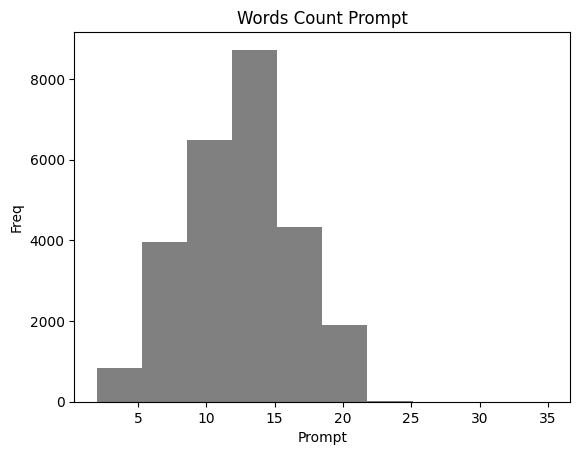

In [12]:
plt.hist(prompt_word_count_list, bins=10, color='gray')
plt.title('Words Count Prompt')
plt.xlabel('Prompt')
plt.ylabel('Freq')
plt.show()

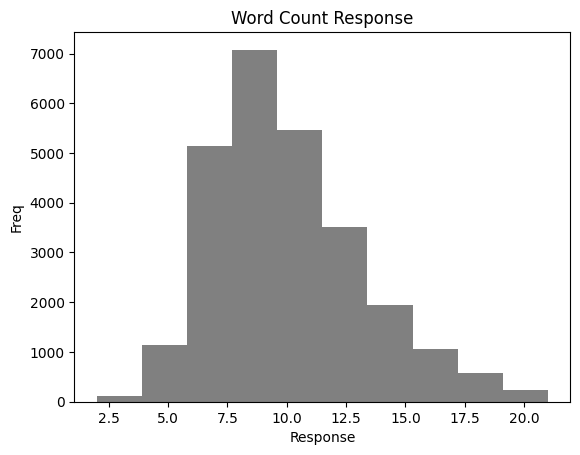

In [13]:
plt.hist(response_word_count_list, bins=10, color='gray')
plt.title('Word Count Response')
plt.xlabel('Response')
plt.ylabel('Freq')
plt.show()

In [14]:
with open('/kaggle/working/train.txt', 'w') as file:
    for prompt, response in zip(train_df['prompt'], train_df['response']):
      file.write("Prompt: " + prompt + " Response: " + response + "\n")

In [15]:
with open('/kaggle/working/dev.txt', 'w') as file:
    for prompt, response in zip(dev_df['prompt'], dev_df['response']):
      file.write("Prompt: " + prompt + " Response: " + response + "\n")

In [16]:
train_file_path = "/kaggle/working/train.txt"
eval_file_path = "/kaggle/working/dev.txt"
model_name = 'gpt2'
rouge = evaluate.load('rouge')
sacrebleu = evaluate.load("sacrebleu")
bertscore = evaluate.load("bertscore")
output_dir = '/kaggle/output'
overwrite_output_dir = False
per_device_train_batch_size = 1
num_train_epochs = 1
save_steps = 10000

In [17]:
# import warnings

# # Ignore all warnings
# warnings.filterwarnings("ignore")

# # Your code that may generate warnings

# # To reset the warning settings to their defaults:
# warnings.resetwarnings()


In [18]:
!pip install evaluate

In [19]:
!pip install evaluate sacrebleu

In [20]:
import evaluate

In [21]:
class GPT2Trainer:
    def __init__(self, train_path, eval_path, output_dir, model_name='gpt2', overwrite_output_dir=False,
                 per_device_train_batch_size=1, num_train_epochs=0.2, save_steps=100000):
        self.train_path = train_path
        self.eval_path = eval_path
        self.output_dir = output_dir
        self.model_name = model_name
        self.overwrite_output_dir = overwrite_output_dir
        self.per_device_train_batch_size = per_device_train_batch_size
        self.num_train_epochs = num_train_epochs
        self.save_steps = save_steps

    def load_data_collator(self, tokenizer, mlm=False):
        return DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=mlm)
    
    
    def load_dataset(self, file_path, tokenizer):
        dataset = LineByLineTextDataset(
                tokenizer=tokenizer,
                file_path=file_path,
                block_size=512
        )

        return dataset

    def postprocess_text(self, preds, labels):
        preds = [pred.strip() for pred in preds]
        labels = [[label.strip()] for label in labels]
        return preds, labels

    def preprocess_logits_for_metrics(self, logits, labels):
        pred_ids = torch.argmax(logits, dim=-1)
        return pred_ids, labels

#     def compute_metrics(self, eval_preds, tokenizer, rouge_metric, sacrebleu_metric, bert_scorer, labels):
    def compute_metrics(self, eval_preds):
        tokenizer = GPT2Tokenizer.from_pretrained(self.model_name)
        tokenizer.add_special_tokens({'pad_token': '[PAD]'})
        logits, labels = eval_preds
        preds = logits[0]
        preds = np.where(preds != -100, preds, tokenizer.pad_token_id)
        decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
        labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
        preds, labels = self.postprocess_text(decoded_preds, decoded_labels)

        sacrebleu_metric = evaluate.load("sacrebleu")
        rouge_metric = evaluate.load('rouge')
        bertscore = evaluate.load("bertscore")
        rouge_result = rouge_metric.compute(predictions=decoded_preds, references=decoded_labels)
        sacrebleu_result = sacrebleu_metric.compute(predictions=decoded_preds, references=decoded_labels, lowercase=True)
        bert_result = bertscore.compute(predictions=decoded_preds, references=decoded_labels, lang="en")

        return {
        "R1": round(rouge_result["rouge1"], 4),
        "R2": round(rouge_result["rouge2"], 4),
        "RL": round(rouge_result["rougeL"], 4),
        "RLsum": round(rouge_result["rougeLsum"], 4),
        "bleu": round(sacrebleu_result["score"], 4),
        "precision1":round(bert_result["precision"][0], 4),
        "precision2":round(bert_result["precision"][1], 4),
        "recall1":round(bert_result["recall"][0], 4),
        "recall2":round(bert_result["recall"][1], 4),
        "f1-score1":round(bert_result["f1"][0], 4),
        "f1-score2":round(bert_result["f1"][1], 4)
    }
    def train_model(self):
        tokenizer = GPT2Tokenizer.from_pretrained(self.model_name)
        tokenizer.add_special_tokens({'pad_token': '[PAD]'})

        model = GPT2LMHeadModel.from_pretrained(self.model_name)
        model.resize_token_embeddings(len(tokenizer))
        model.save_pretrained(self.output_dir)

        train_dataset = self.load_dataset(self.train_path, tokenizer)
        eval_dataset = self.load_dataset(self.eval_path, tokenizer)

        data_collator = self.load_data_collator(tokenizer)

        tokenizer.save_pretrained(self.output_dir)

        training_args = TrainingArguments(
            output_dir=self.output_dir,
            evaluation_strategy="epoch",
            learning_rate=1e-5,
            overwrite_output_dir=self.overwrite_output_dir,
            per_device_train_batch_size=self.per_device_train_batch_size,
            per_device_eval_batch_size=1,
            num_train_epochs=self.num_train_epochs
        )

        trainer = Trainer(
            model=model,
            args=training_args,
            data_collator=data_collator,
            train_dataset=train_dataset,
            eval_dataset=eval_dataset,
            preprocess_logits_for_metrics=self.preprocess_logits_for_metrics,
            compute_metrics=self.compute_metrics
        )

        trainer.train()
        trainer.save_model()


if __name__ == "__main__":
    train_file_path = "/kaggle/working/train.txt"
    eval_file_path = "/kaggle/working/dev.txt"
    model_name = 'gpt2'
    rouge = evaluate.load('rouge')
    sacrebleu = evaluate.load("sacrebleu")
    bertscore = evaluate.load("bertscore")
    output_dir = '/kaggle/output'
    overwrite_output_dir = False
    per_device_train_batch_size = 1
    num_train_epochs = 0.2
    save_steps = 10000    
    trainer = GPT2Trainer(train_file_path, eval_file_path, output_dir)
    trainer.train_model()

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embedding dimension will be 50258. This might induce some performance reduction as *Tensor Cores* will not be available. For more details about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc
/opt/conda/lib/python3.10/site-packages/transformers/data/datasets/language_modeling.py:119: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser her

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,R1,R2,Rl,Rlsum,Bleu,Precision1,Precision2,Recall1,Recall2,F1-score1,F1-score2
0,2.557300,2.406525,0.478800,0.195300,0.426900,0.426900,16.529600,0.879700,0.858000,0.902500,0.865700,0.891000,0.861800


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
# pip install bert_score

In [23]:
# import torch
# import numpy as np
# from transformers import (
#     GPT2Tokenizer,
#     GPT2LMHeadModel,
#     TrainingArguments,
#     Trainer,
#     DataCollatorForLanguageModeling,
#     LineByLineTextDataset,
# )
# from bert_score import BERTScorer
# import evaluate

# class GPT2Trainer:
#     def __init__(self, train_path, eval_path, output_dir, model_name='gpt2', overwrite_output_dir=False,
#                  per_device_train_batch_size=1, num_train_epochs=10, save_steps=100000):
#         self.train_path = train_path
#         self.eval_path = eval_path
#         self.output_dir = output_dir
#         self.model_name = model_name
#         self.overwrite_output_dir = overwrite_output_dir
#         self.per_device_train_batch_size = per_device_train_batch_size
#         self.num_train_epochs = num_train_epochs
#         self.save_steps = save_steps

#     def load_data_collator(self, tokenizer, mlm=False):
#         return DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=mlm)
    
    
#     def load_dataset(self, file_path, tokenizer):
#         dataset = LineByLineTextDataset(
#                 tokenizer=tokenizer,
#                 file_path=file_path,
#                 block_size=512
#         )

#         return dataset

#     def postprocess_text(self, preds, labels):
#         preds = [pred.strip() for pred in preds]
#         labels = [[label.strip()] for label in labels]
#         return preds, labels

#     def preprocess_logits_for_metrics(self, logits, labels):
#         pred_ids = torch.argmax(logits, dim=-1)
#         return pred_ids, labels

# #     def compute_metrics(self, eval_preds, tokenizer, rouge_metric, sacrebleu_metric, bert_scorer, labels):
#     def compute_metrics(self, eval_preds):
#         tokenizer = GPT2Tokenizer.from_pretrained(self.model_name)
#         tokenizer.add_special_tokens({'pad_token': '[PAD]'})
#         logits, labels = eval_preds
#         preds = logits[0]
#         preds = np.where(preds != -100, preds, tokenizer.pad_token_id)
#         decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
#         labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
#         decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
#         preds, labels = self.postprocess_text(decoded_preds, decoded_labels)

#         sacrebleu_metric = evaluate.load("sacrebleu")
#         rouge_metric = evaluate.load('rouge')
#         bertscore = evaluate.load("bertscore")
#         rouge_result = rouge_metric.compute(predictions=decoded_preds, references=decoded_labels)
#         sacrebleu_result = sacrebleu_metric.compute(predictions=decoded_preds, references=decoded_labels, lowercase=True)
#         bert_result = bertscore.compute(predictions=decoded_preds, references=decoded_labels, lang="en")

#         return {
#         "R1": round(rouge_result["rouge1"], 4),
#         "R2": round(rouge_result["rouge2"], 4),
#         "RL": round(rouge_result["rougeL"], 4),
#         "RLsum": round(rouge_result["rougeLsum"], 4),
#         "bleu": round(sacrebleu_result["score"], 4),
#         "precision1":round(bert_result["precision"][0], 4),
#         "precision2":round(bert_result["precision"][1], 4),
#         "recall1":round(bert_result["recall"][0], 4),
#         "recall2":round(bert_result["recall"][1], 4),
#         "f1-score1":round(bert_result["f1"][0], 4),
#         "f1-score2":round(bert_result["f1"][1], 4)
#     }
#     def train_model(self):
#         tokenizer = GPT2Tokenizer.from_pretrained(self.model_name)
#         tokenizer.add_special_tokens({'pad_token': '[PAD]'})

#         model = GPT2LMHeadModel.from_pretrained(self.model_name)
#         model.resize_token_embeddings(len(tokenizer))
#         model.save_pretrained(self.output_dir)

#         train_dataset = self.load_dataset(self.train_path, tokenizer)
#         eval_dataset = self.load_dataset(self.eval_path, tokenizer)

#         data_collator = self.load_data_collator(tokenizer)

#         tokenizer.save_pretrained(self.output_dir)

#         training_args = TrainingArguments(
#             output_dir=self.output_dir,
#             evaluation_strategy="epoch",
#             learning_rate=1e-5,
#             overwrite_output_dir=self.overwrite_output_dir,
#             per_device_train_batch_size=self.per_device_train_batch_size,
#             per_device_eval_batch_size=1,
#             num_train_epochs=self.num_train_epochs
#         )

#         trainer = Trainer(
#             model=model,
#             args=training_args,
#             data_collator=data_collator,
#             train_dataset=train_dataset,
#             eval_dataset=eval_dataset,
#             preprocess_logits_for_metrics=self.preprocess_logits_for_metrics,
#             compute_metrics=self.compute_metrics
#         )

#         trainer.train()
#         trainer.save_model()

# if __name__ == "__main__":
#     train_path = "/kaggle/working/train.txt"
#     eval_path = "/kaggle/working/dev.txt"
#     output_dir = "/kaggle/output"

#     bert_scorer = BERTScorer(lang="en", rescale_with_baseline=True)
    
#     trainer = GPT2Trainer(train_path, eval_path, output_dir)
#     trainer.train_model()
